In [3]:
from fasta import *

# Load data

In [4]:
df_all = load_data(n_row=5000)

In [3]:
features = ['length', 'number_exons', 'length_from_pos', 'number_introns', 'mean_exon_length', 'ratio_g', 'ratio_a', 'ratio_c', 'ratio_t']

# Create pair plot for all features

/home/hannes/.conda/envs/data/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


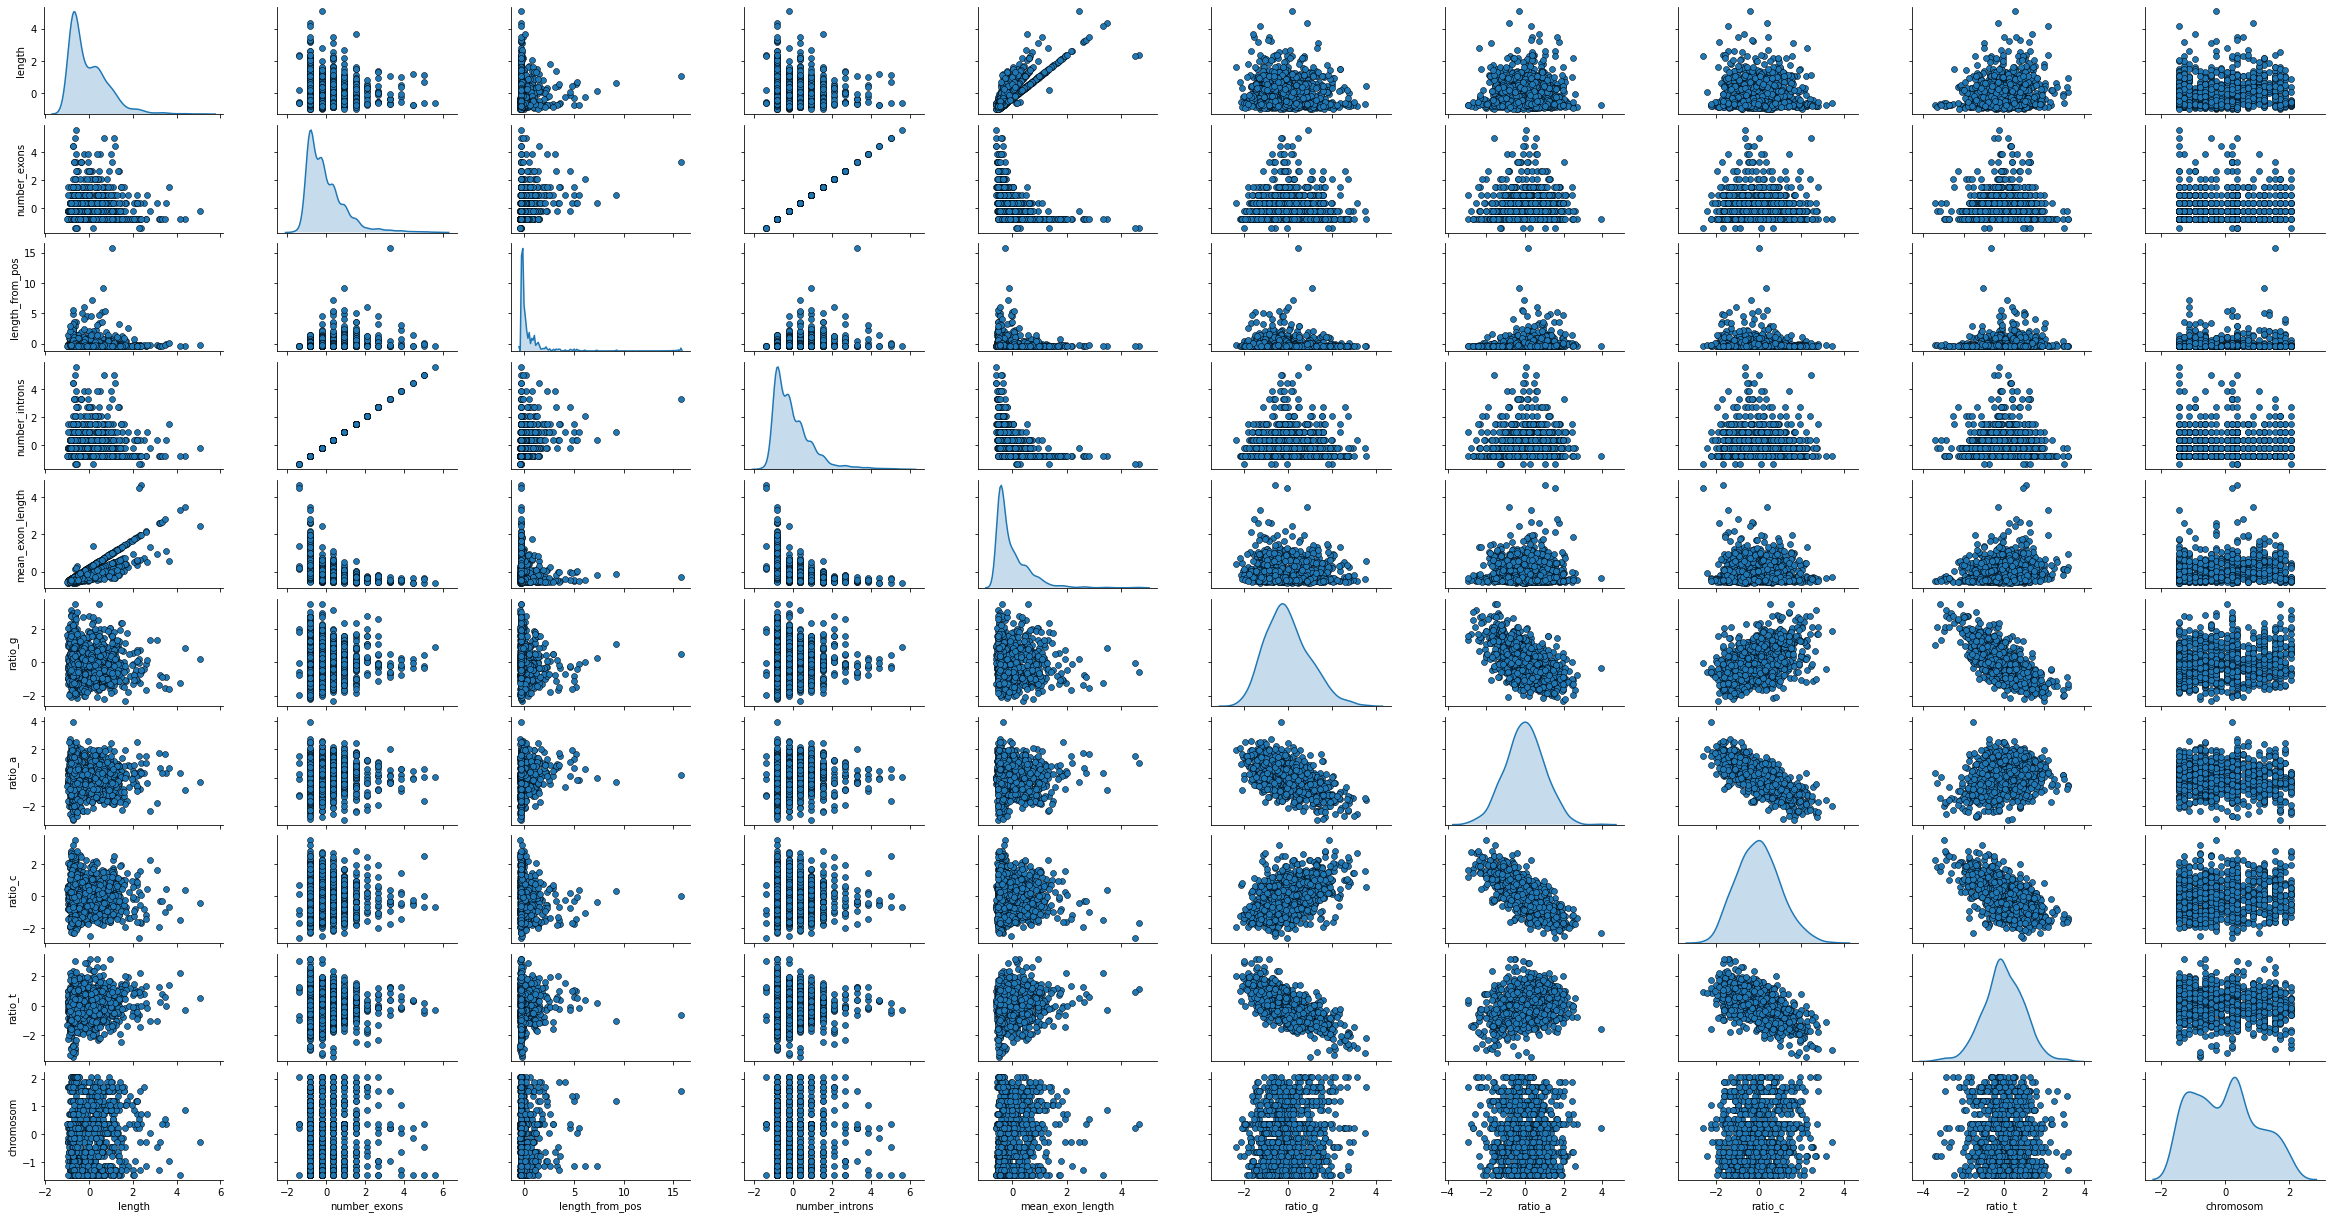

In [8]:
pair(df_all, features)

# Run all cluster algorithms and save to output dir

In [ ]:
features = ['length', 'number_exons', 'length_from_pos', 'number_introns', 'mean_exon_length', 'ratio_g', 'ratio_a', 'ratio_c', 'ratio_t', 'chromosoms_label']
run_all_clustering(df, features)

# Ausreiser ?

In [4]:
df_all = df_all[df_all['length'] < 15]
features = ['length', 'number_exons', 'length_from_pos', 'number_introns', 'mean_exon_length', 'ratio_g', 'ratio_a', 'ratio_c', 'ratio_t', 'chromosom']
#(df_all, features)

NameError: name 'df_all' is not defined

# Findings

## Length

### Optimize K-Means - Find optimal number of clusters

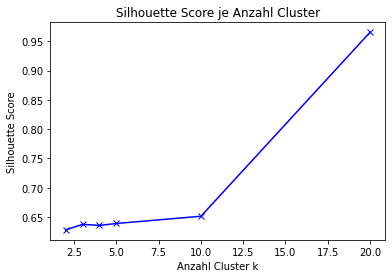

In [9]:
df = df_all[['chromosom']]
k = [2, 3, 4, 5, 10, 20]
best_k, scores = find_best_number_clusters(df, k)
plot_elbow(k, scores)

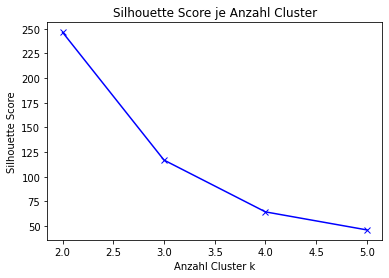

In [6]:
best_k, scores = find_best_number_clusters_sum_squares(df, k)
plot_elbow(k, scores)

NameError: name 'output_path' is not defined

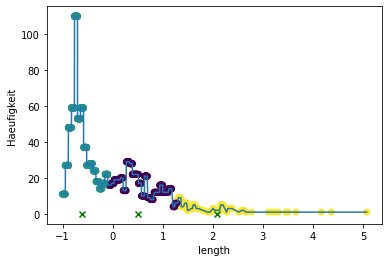

In [21]:
run_kmeans(df, 3)

### Optimize DBSCAN - Find optimal epsilon

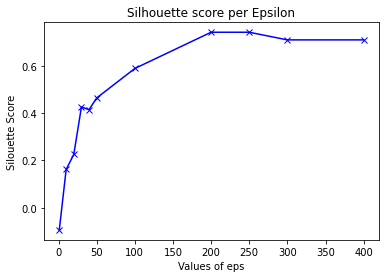

In [7]:
find_best_eps(df, [1, 10, 20, 30, 40, 50, 100, 200, 250, 300, 400])

In [4]:
run_dbscan(df, 200)

Series([], Name: length, dtype: int64)


IndexError: single positional indexer is out-of-bounds

## Playgorund

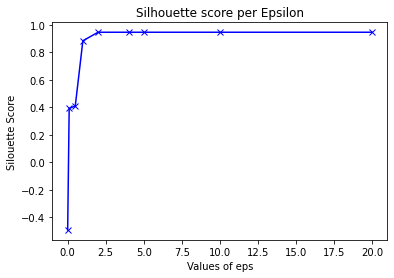

In [6]:
df = df_all[['number_introns', 'number_exons']]
find_best_eps(df)

In [ ]:
run_dbscan(df, 40)

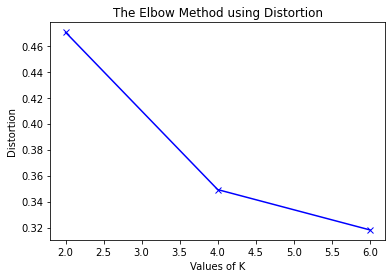

In [16]:
df = df_all[['number_exons', 'length_from_pos', 'ratio_t']]
k = [2, 4, 6]
best_k, scores = find_best_number_clusters(df, k)
plot_elbow(k, scores)

NameError: name 'output_path' is not defined

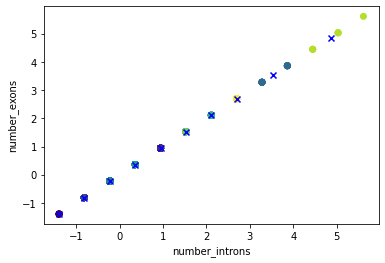

In [10]:
run_kmeans(df, 10)

In [5]:
def get_best_combinations(combination_length, threshold=0.5, algo='kmeans'):
    import itertools
    combinations_silouette_over_threshold = []
    for combination in itertools.combinations(features, combination_length):
        df = df_all[list(combination)]
        if algo == 'kmeans':
            best_value, scores = find_best_number_clusters(df, [2,3,4,5,6])
        else:
            best_value, scores = find_best_eps(df, [0.0001, 0.001, 0.1, 0.5, 1])
        if best_value:
            best_score = max(scores)
            if best_score > threshold:
                combinations_silouette_over_threshold.append([best_value, best_score, combination])

    return combinations_silouette_over_threshold

In [6]:
def plot_best_combinations(dimension, combinations, threshold, fig, number_rows, number_cols, algo='kmeans'):
    from mpl_toolkits.mplot3d import Axes3D
    fig.suptitle('Cluster mit Silouette Score > %s' % threshold, fontsize=20)
        
    for i, useful_combination in enumerate(combinations):
        projection = '3d' if dimension == 3 else 'rectilinear'
        
        df = df_all[list(useful_combination[2])]
        best_value = useful_combination[0]
        best_score = useful_combination[1]
        if algo == 'kmeans':
            model, centroids, labels = fit_kmeans(df, best_value)
        else:
            n_clusters_, n_noise_, labels, core_samples_mask = fit_dbscan(df, best_value)
            
        ax = fig.add_subplot('%s%s%s' % (number_rows, number_cols, i),projection=projection)
        if algo == 'kmeans':
            ax.title.set_text('#Clusters: %s, Score: %.2f' % (best_value, best_score))
            if dimension == 1:
                plot_kmeans_1d(centroids, df, best_value, model, ax)
            elif dimension == 2:
                plot_kmeans_2d(centroids, df, best_value, model, ax)
            else:
                plot_kmeans_3d(model, df, ax)
        else:
            ax.title.set_text('Epsilon: %s, Score: %.2f' % (best_value, best_score))
            if dimension == 2:
                plot_dbscan(df, labels, core_samples_mask, n_clusters_, ax)
            else:
                plot_dbscan_3d(df, labels, core_samples_mask, n_clusters_, ax)
    plt.show()



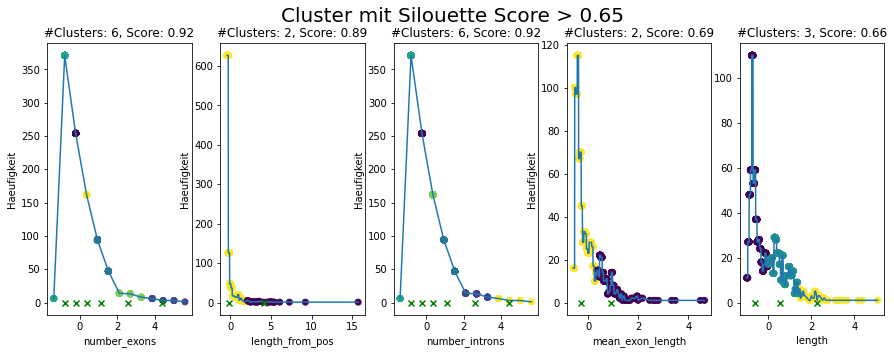

In [38]:
combinations = get_best_combinations(1, 0.65)
number_rows = 1
number_cols = 5
fig = plt.figure(figsize=(15,5))
plot_best_combinations(1, combinations, 0.65, fig, number_rows, number_cols)

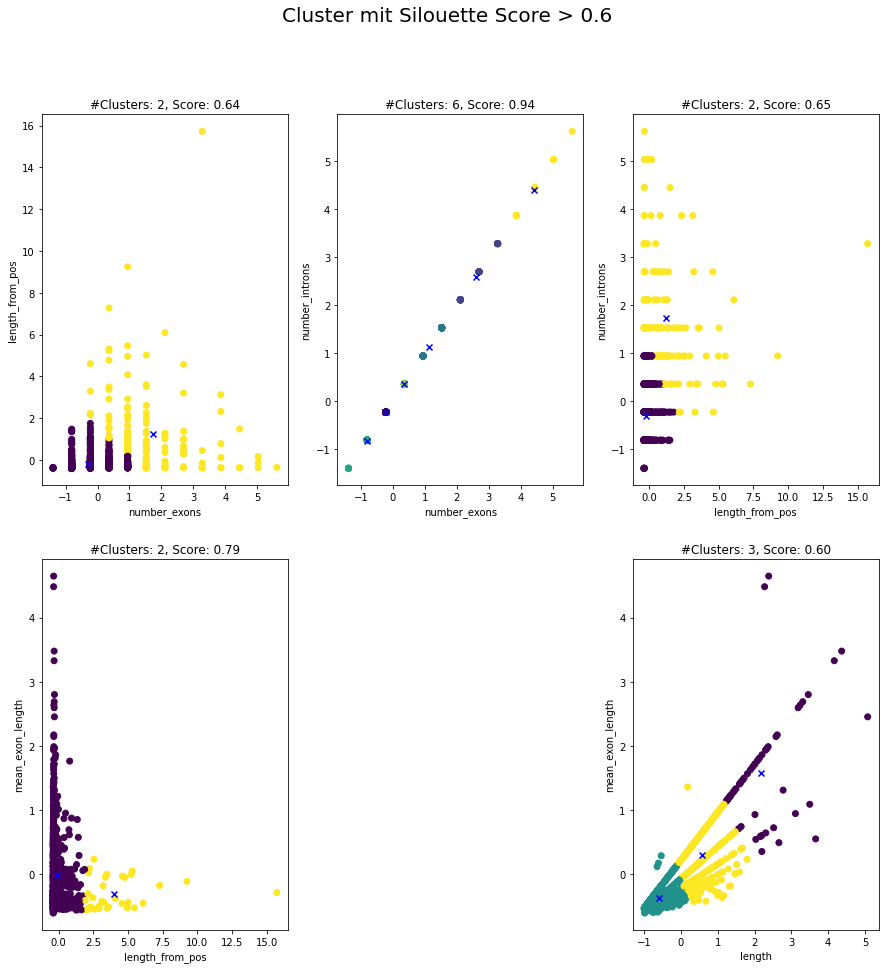

In [32]:
combinations = get_best_combinations(2, 0.6)
plot_best_combinations(2, combinations, 0.6)

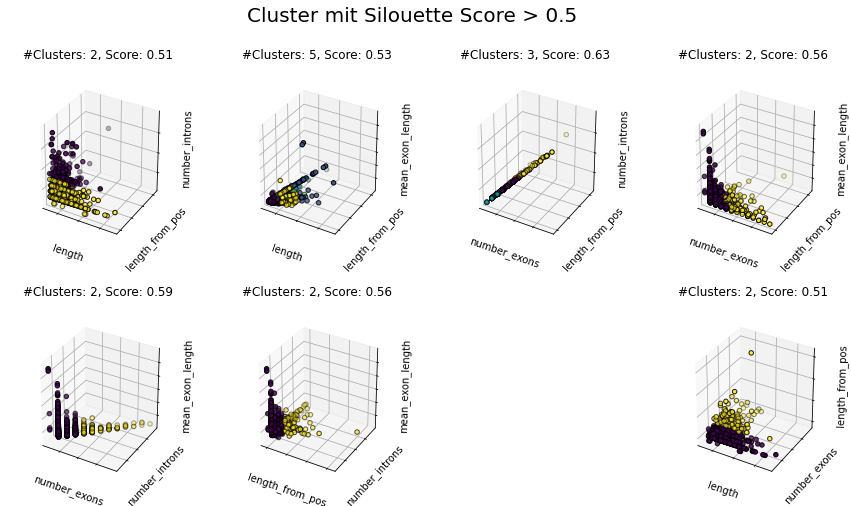

In [45]:
combinations = get_best_combinations(3, 0.5)
number_rows = 2
number_cols = 4
fig = plt.figure(figsize=(15,8))
plot_best_combinations(3, combinations, 0.5, fig, number_rows, number_cols)

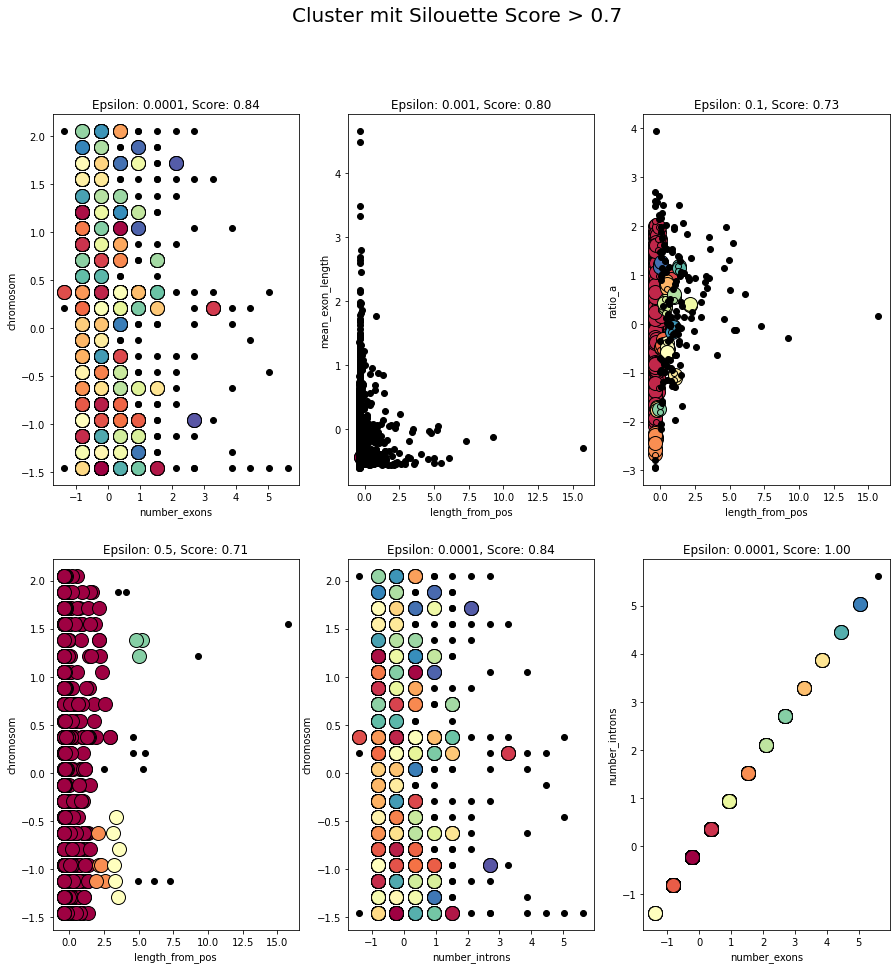

In [24]:
combinations = get_best_combinations(2, 0.7, algo='dbscan')
plot_best_combinations(2, combinations, 0.7, algo='dbscan')

IndexError: index 8 is out of bounds for GridSpec with size 8

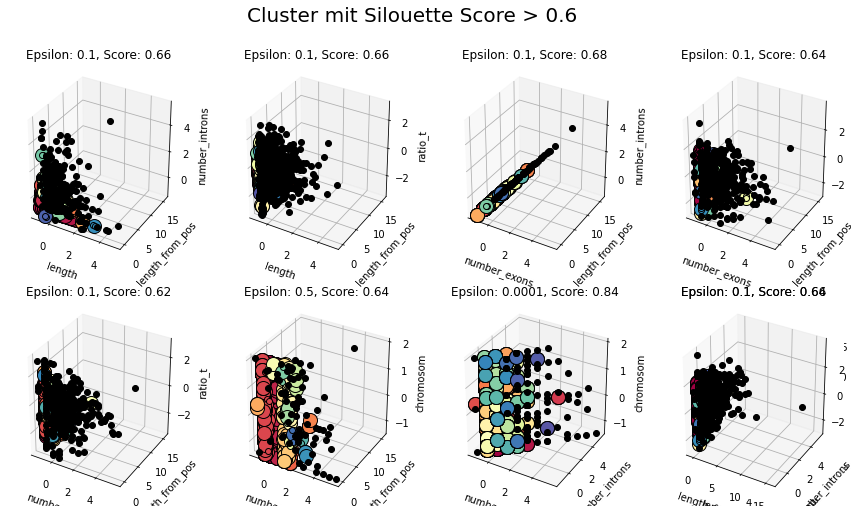

In [8]:
combinations = get_best_combinations(3, 0.6, algo='dbscan')
number_rows = 2
number_cols = 4
fig = plt.figure(figsize=(15,8))
plot_best_combinations(3, combinations, 0.6, fig, number_rows, number_cols, algo='dbscan')